### Importing Needed packages


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os 
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")


### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [36]:
# Download this file 
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv"

<h2 id="reading_data">Reading the data in adnd Data exploration </h2>

In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")
# take a look at the dataset

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

Lets select some features to explore more.


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these features:


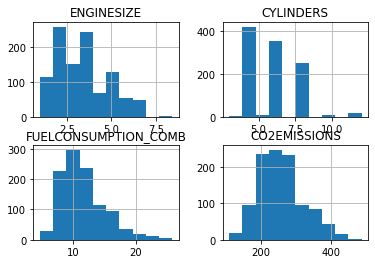

In [10]:
cdf.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:


<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

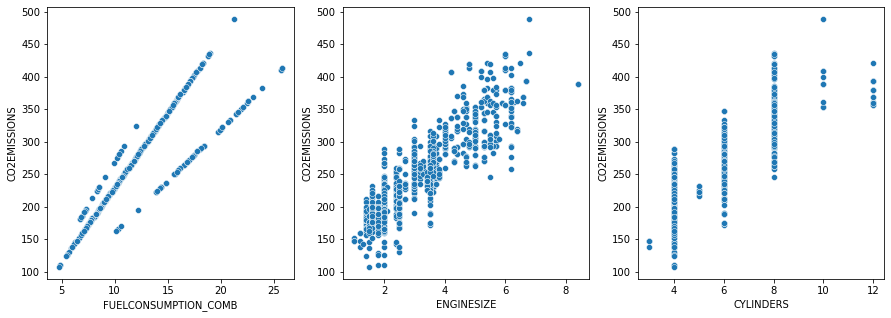

In [82]:
import seaborn as sns

fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=df["FUELCONSUMPTION_COMB"], y= df["CO2EMISSIONS"], ax=axs[0])
sns.scatterplot(x=df["ENGINESIZE"], y= df["CO2EMISSIONS"], ax=axs[1])
sns.scatterplot(x=df["CYLINDERS"], y= df["CO2EMISSIONS"], ax=axs[2])

Double-click **here** for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->


In [83]:
msk = np.random.rand(len(df)) < 0.8
train, test = cdf[msk], cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 


#### Train data distribution


#### Modeling

Using sklearn package to model data.


Coefficients:  [[39.52284873]]
Intercept:  [124.72992417]
Mean absolute error: 22.26
Residual sum of squares (MSE): 850.28
R2-score: 0.73


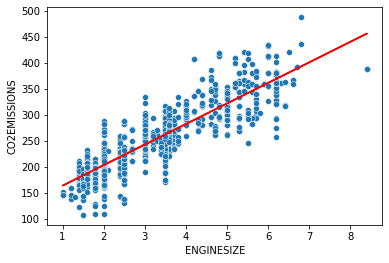

In [88]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
sns.scatterplot(x=df["ENGINESIZE"], y= df["CO2EMISSIONS"])
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


# Prediction and the error estimation
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="multiple_regression">Multiple Regression Model</h2>

Coefficients:  [[9.42337778 8.2535324  9.55857193]]
Intercept:  [65.60467948]
Mean absolute error: 16.77
Residual sum of squares (MSE): 524.59
R2-score: 0.84


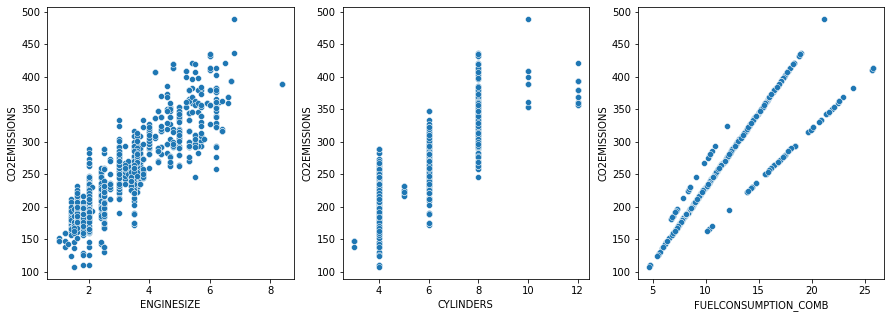

In [24]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")


# Describe independent and dependent variables
ind = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])

        
        
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# Fit the model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = regr.predict(test_x)



# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

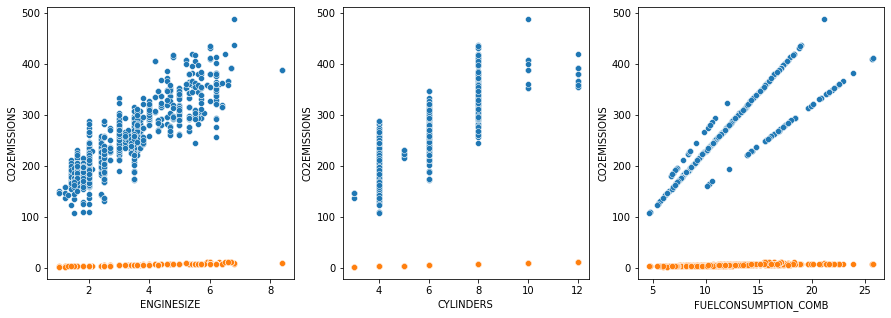

In [21]:
fig